# Indeed.com - Job Description Analyis
I will use NLP (natural language processing) to analyse job adverts scraped from the uk.Indeed.com jobs website

I will focus on UK based jobs in the data industry, mainly in Scottish companies to start with, keeping the data gathering steps manageable, possibly expanding the study to the rest of the UK later.

I will write my own web scraper using the Requests and BeautifulSoup libraries.  I plan to process the text data using the nltk library

## What would the business purpose be?
Suppose I am running a hypothetical data analytics company.  I have been approached by another company who are hoping to build and recruit a data analytics team.  Since they don't have an existing data analytics team, I have been given a list of skills and experience they think they need.  My challenge is to classify what job title they should be marketing their vacancy for.  Should it be a Data Scientist, or a Data Engineer etc.

I am also (hypothetically) working with candidates to best tailor their CV, project portfolio etc to optimise for the things that data industry recruiters are looking for.  My study should be able to generate a list of the key things for each of the major data professions.

## Sections (rough outline)
- Scrape the data
- Data cleaning
- Data exploration
  - Extracting the list of top skills requirements for each of the main disciplines
  - Picking out common phrases to reference in an optimised CV
- Feature engineering
  - Job description length
  - Years of experience mentioned
  - Salary range (if enough data available)
  - Key tech stack tools included, cloud platforms, databases, NLP, dashboards etc.
  - Mentioning remote, flexible working etc
- Model Building
  - Classifier for labelling a job ad, with the most approproate job title.
  - Naieve Bayes
- Model Tuning



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
import indeed.IndeedScraper as ind

# Scrape the data

In [7]:
# Scrape new data (or use existing csv)?
scrape_new = False

f_name = 'data.csv'
if scrape_new or not os.path.isfile(f_name):
    df = pd.read_csv(f_name, index_col=0)
else:
    ind.batch_scrape([('Data Scientist', 'Scotland'),
                      ('Data Engineer', 'Scotland'),
                      ('Data Analyst', 'Scotland'),
                      ('Business Analyst', 'Scotland'),
                      ('Machine Learning Engineer', 'Scotland'),
                      ('Machine Learning', 'Scotland'),
                      ('Artificial Intelligence', 'Scotland'),
                      ('AI', 'Scotland'),
                      ('Data', 'Scotland')],
                     pages=20,
                     delay=5,
                     append=False)
    df = pd.read_csv(f_name, index_col=0)


# Data cleaning

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 161
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   title             208 non-null    object  
 1   id                208 non-null    object  
 2   company           208 non-null    object  
 3   url               208 non-null    object  
 4   location          208 non-null    object  
 5   summary           208 non-null    object  
 6   date              208 non-null    object  
 7   description       208 non-null    object  
 8   description_html  208 non-null    object  
 9   page_format       208 non-null    float64 
 10  salary            32 non-null     object  
 11  query_title       208 non-null    category
 12  query_loc         208 non-null    object  
dtypes: category(1), float64(1), object(11)
memory usage: 21.5+ KB


In [14]:
df.head().iloc[0].T

title                                                  Data Scientist
id                                                   44d7c15b1b5e4dc0
company                                                 NatWest Group
url                 https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...
location                                                    Edinburgh
summary             Experience with data science software, databas...
date                                                     30+ days ago
description         Join us as a Data Scientist\nYou’ll be identif...
description_html    <div class="jobsearch-jobDescriptionText" id="...
page_format                                                       0.0
salary                                                            NaN
query_title                                            data+scientist
query_loc                                                    Scotland
Name: 0, dtype: object

Check if there are any duplicates in the "id" column.  Since the scraped csv data was simply multiple search queries, then results appended into one big csv file.  It's possible for there to be some duplicates where id numbers are the same, between the multiple batches.

In [16]:
df.duplicated('id').sum()

2

Turn query_title into categorical and plot

In [32]:
df['query_title'] = df['query_title'].astype('category')

In [ ]:
# sns.catplot(data=df, x='query_title', kind='bar')

# Data exploration

Try a few things
- Wordcloud

In [39]:

from wordcloud import WordCloud
import numpy as np

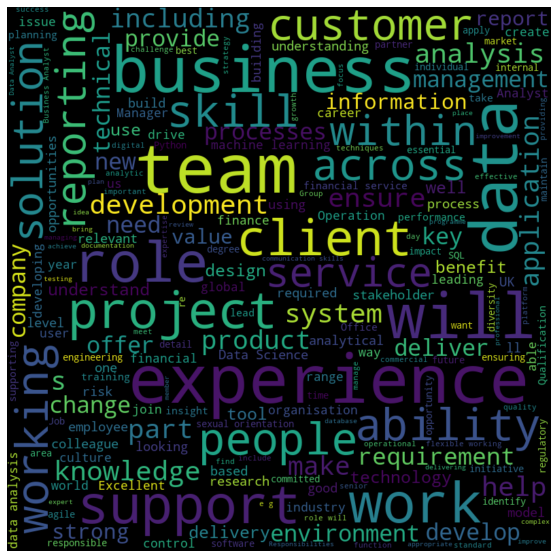

In [57]:
# Read the whole text.
# text = df.description.iloc[0]
text = ' '.join(df['description'].tolist())

# Generate a word cloud image
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=100, width=800, height=800).generate(text)
WordCloud()
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


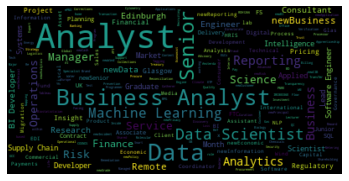

In [31]:
# Read the whole text.
# text = df.description.iloc[0]
text = ' '.join(df['title'].tolist())

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
